In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#All from other notebook
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector

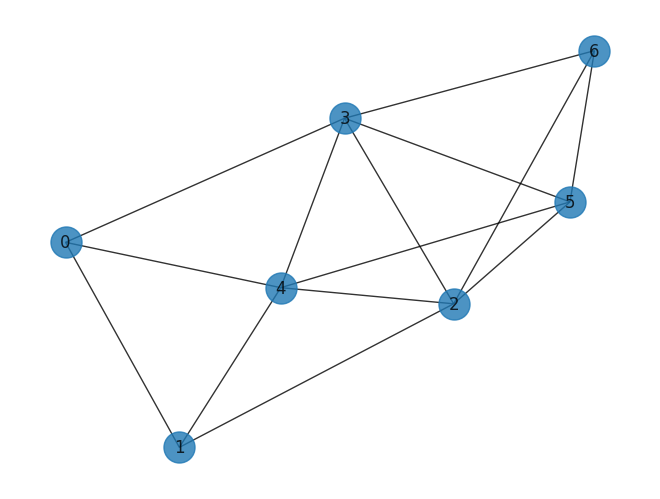

In [4]:
import networkx as nx
shotnum = 20000
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4, 5, 6])
G.add_edges_from([(0, 3), (0,1), (0,4), (1,4), (1,2), (4,2), (4,3), (4,5), (3,2),(3,6),(3,5),(2,5),(2,6),(6,5)])
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

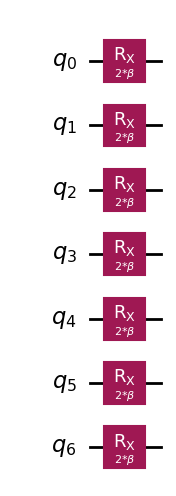

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(G).todense()

nqubits = len(G.nodes)

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_mix.rx(2 * beta, i)
    
qc_mix.draw('mpl')

(0, 3)
(0, 1)
(0, 4)
(1, 4)
(1, 2)
(2, 4)
(2, 3)
(2, 5)
(2, 6)
(3, 4)
(3, 6)
(3, 5)
(4, 5)
(5, 6)


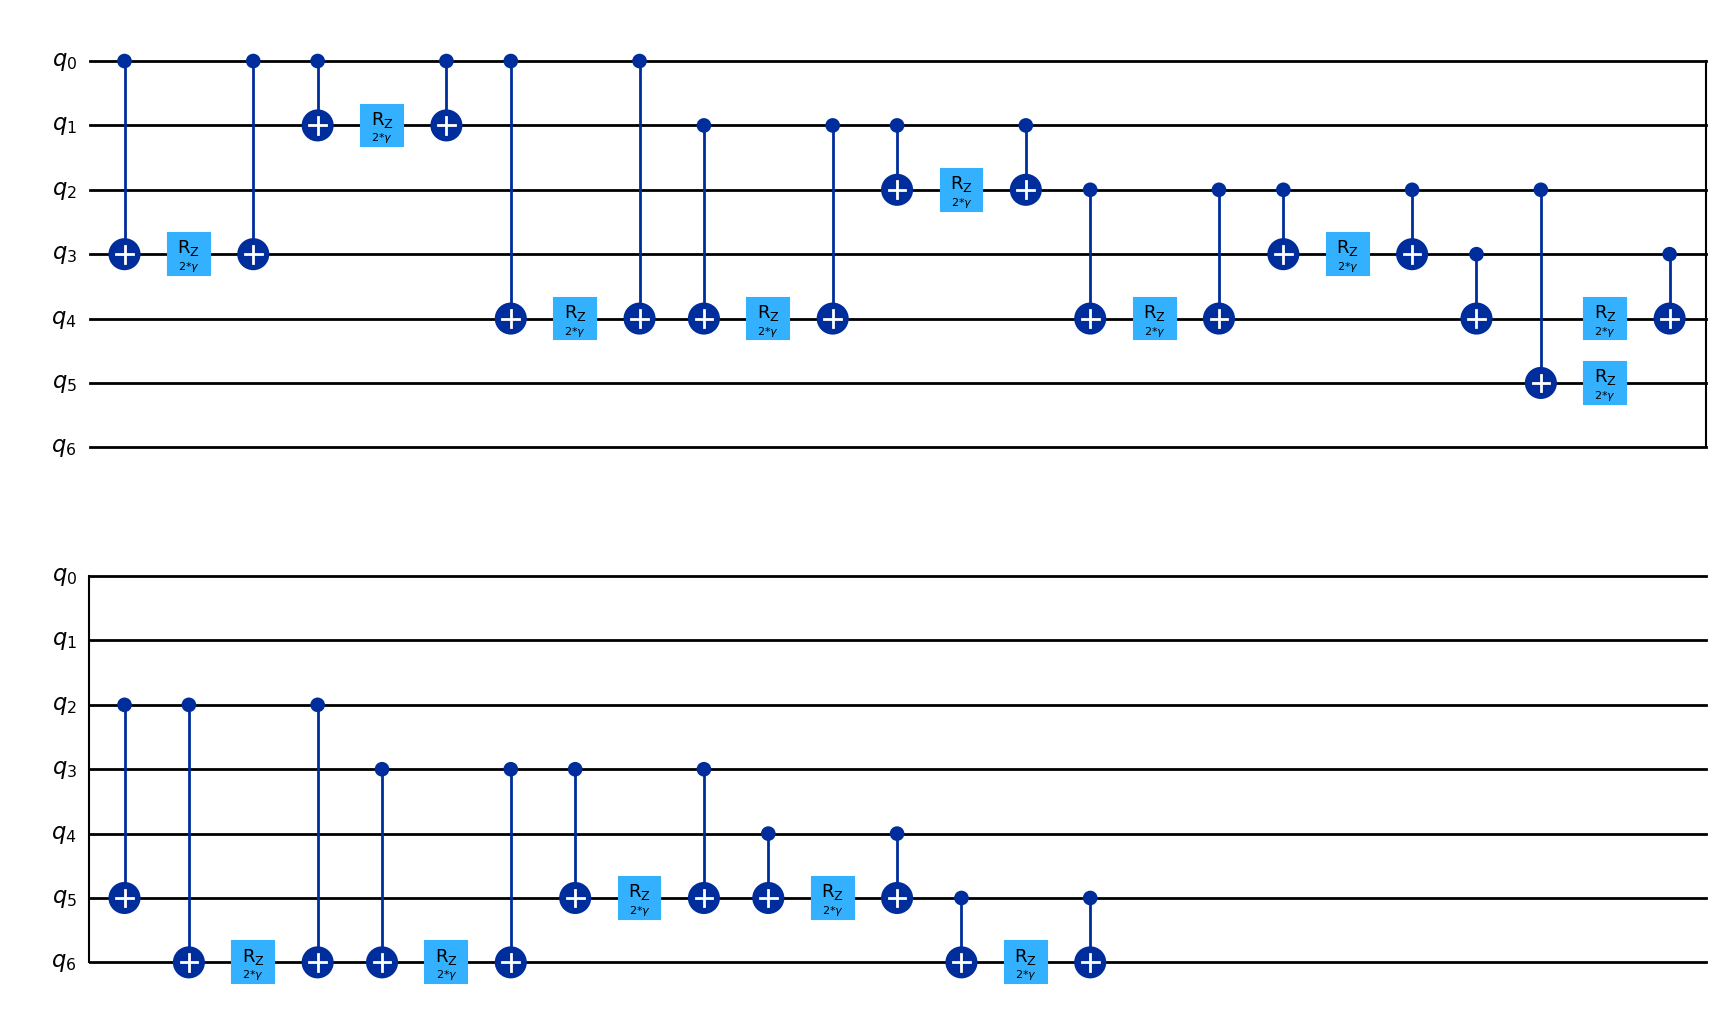

In [6]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(nqubits)
for pair in list(G.edges()):  # pairs of nodes
    print(pair)
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    
qc_p.decompose().draw('mpl')


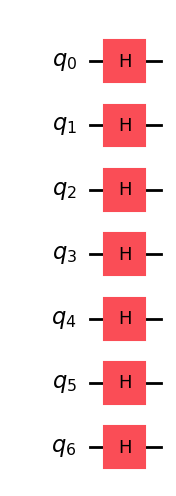

In [7]:
qc_0 = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_0.h(i)
    
qc_0.draw('mpl')

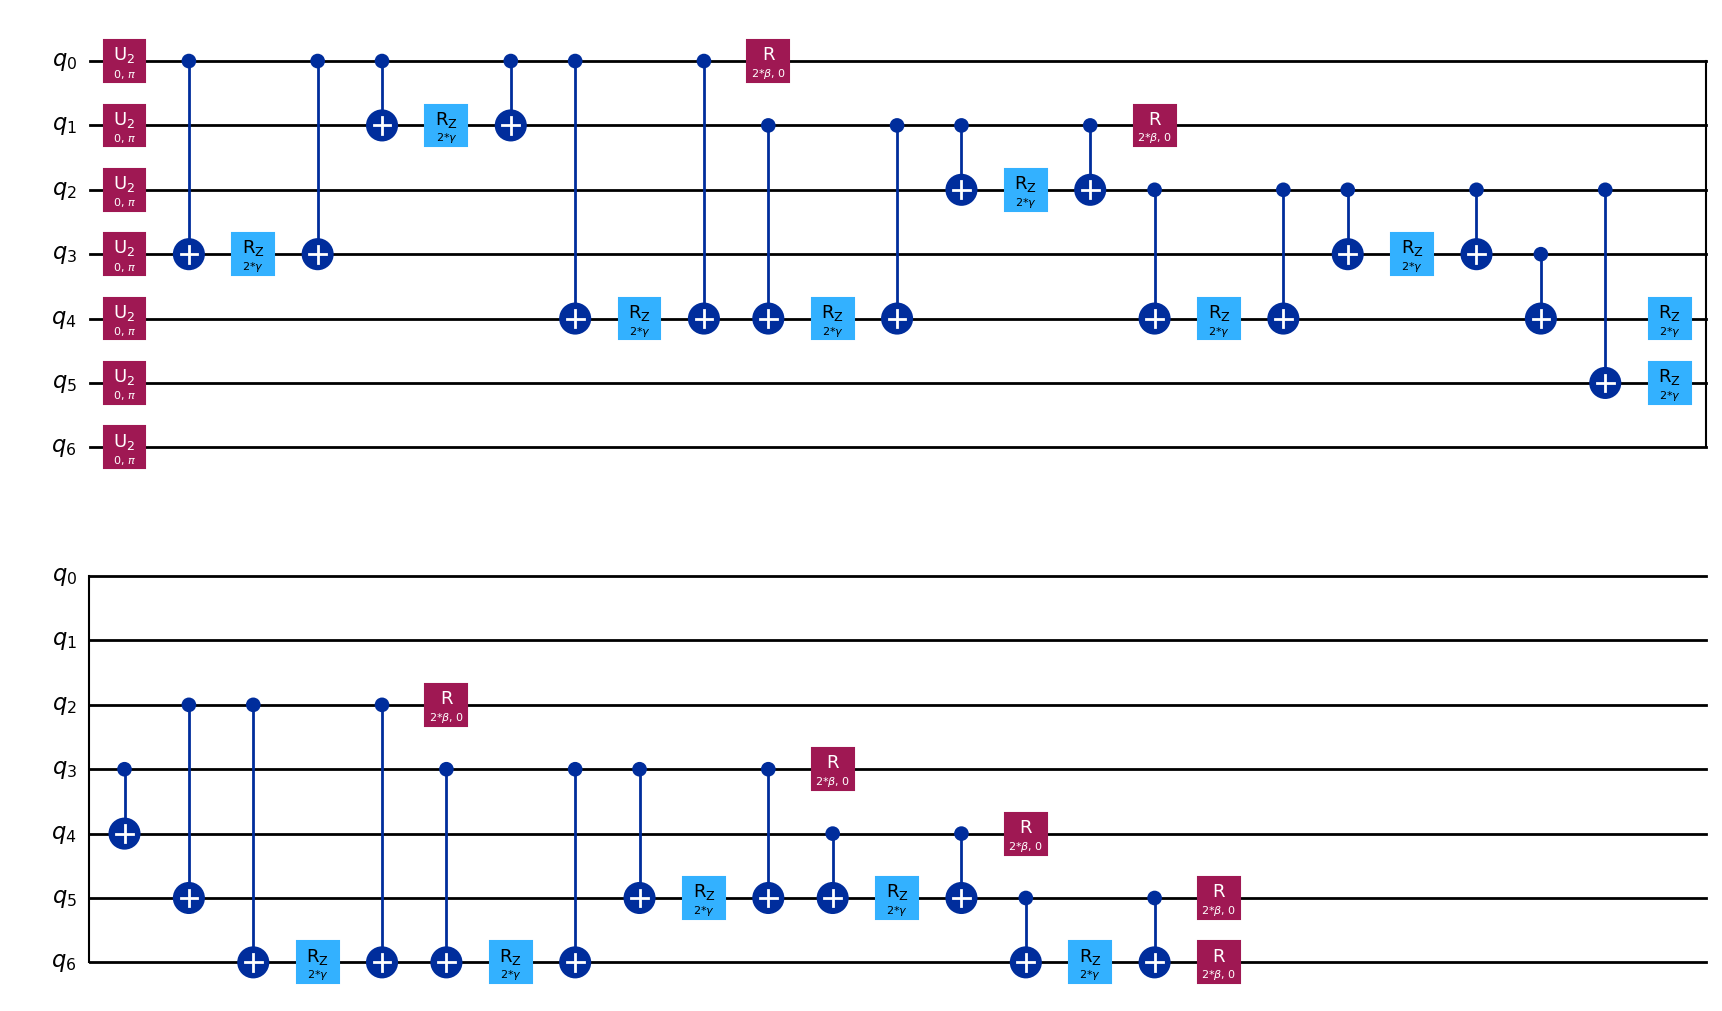

In [8]:
qc_qaoa = QuantumCircuit(nqubits)

qc_qaoa.append(qc_0, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_p, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_mix, [i for i in range(0, nqubits)])

qc_qaoa.decompose().decompose().draw('mpl')

In [21]:
def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    """
    obj = 0
    for i, j in G.edges():
        if x[i] != x[j]:
            obj -= 1
    return obj


def compute_expectation(counts, G):
    """
    Computes expectation value based on measurement results
    """
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        obj = maxcut_obj(bitstring[::-1], G)
        avg += obj * count
        sum_count += count
    print("returned: ", (avg/sum_count))
    return avg/sum_count

Bet = []
Gam = []
# We will also bring the different circuit components that
# build the qaoa circuit under a single function
def create_qaoa_circ(G, theta):
    """
    Creates a parametrized qaoa circuit
    """
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
    qc = QuantumCircuit(nqubits)
    beta = theta[:p]
    gamma = theta[p:]
    #extra start
    print(theta)
    print('beta: ', beta)
    print('gamma: ', gamma)
    Bet.append(beta)
    Gam.append(gamma)
    #gamma, beta = PIDControl(gamma, beta, Gam, Bet)
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    for irep in range(0, p):
        # problem unitary
        for pair in list(G.edges()):
            qc.rzz(2 * gamma[irep], pair[0], pair[1])
        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
    qc.measure_all()
    return qc

def execute_circ(theta):
    qc = create_qaoa_circ(G, theta)
    counts = AerSimulator().run(qc, seed_simulator=10, shots=shotnum).result().get_counts()
    expec = compute_expectation(counts, G)
    return expec

def minimize(attemps):
    beta = 1
    gamma = 1
    step = 1
    for i in range((int)(attemps/20)): #optimizes beta
        expets = []
        for z in range(10):
            expets.append(execute_circ([beta,gamma]))
    
    

[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
gamma:  [2]
returned:  -5.8695
[1, 2]
beta:  [1]
ga

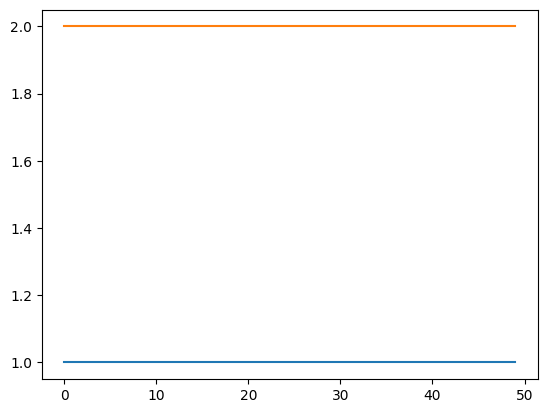

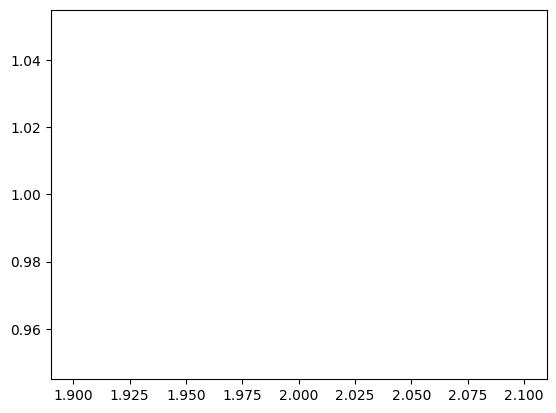

In [22]:
minimize(100)

Tim = range(len(Bet))
plt.plot(Tim, Bet)
plt.plot(Tim, Gam)
plt.show()
plt.plot(Gam, Bet)
plt.show()

[1.2234378 1.3181441]
beta:  [1.2234378]
gamma:  [1.3181441]
{'1010110': 219, '1110000': 249, '1001110': 193, '0001100': 61, '0111101': 2, '0100011': 178, '0001101': 460, '1110111': 8, '1001011': 344, '0001111': 263, '0100110': 199, '0111010': 291, '1110101': 207, '0010100': 93, '1101010': 325, '0111011': 17, '0100101': 612, '0001110': 459, '0000001': 37, '1111011': 12, '1000111': 373, '0110110': 90, '0101010': 631, '0101101': 334, '0110011': 29, '0000110': 43, '0101111': 30, '0110001': 185, '0110100': 336, '0101100': 275, '0110101': 281, '0101011': 204, '1000100': 11, '1111010': 214, '1100101': 328, '0111000': 340, '1011001': 193, '0010101': 294, '1001101': 190, '1110001': 473, '0001011': 229, '0011100': 298, '1010011': 251, '1010101': 622, '1111000': 238, '1100011': 305, '1111111': 14, '1000011': 245, '0101110': 314, '0110010': 195, '0000101': 214, '0011010': 358, '0110000': 96, '1000001': 2, '1111101': 35, '1100001': 150, '1110100': 228, '1001010': 312, '0100111': 204, '1010001': 35

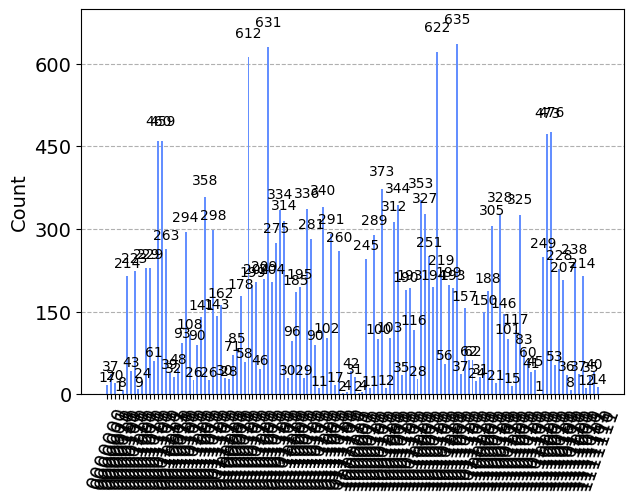

In [23]:
from qiskit.visualization import plot_histogram


qc_res = create_qaoa_circ(G, res.x)

counts = AerSimulator().run(qc_res, seed_simulator=10, shots=shotnum).result().get_counts()
print(counts)
plot_histogram(counts)
